In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('amazon_baby.csv', dtype={"name": str, "review": str, "rating": np.int32})

In [4]:
df.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


# Build word count vector for each view

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
df.dropna(inplace=True)

In [29]:
vectorizer = CountVectorizer()

In [37]:
def word_count(s):
    try:
        x = vectorizer.fit_transform([s])
        res = {}
        voc = vectorizer.get_feature_names()
        for index, count in enumerate(x.toarray()[0]):
            if count > 0:
                res[voc[index]] = count
    except:
        return ''
    return res

In [38]:
df['word_count'] = df['review'].apply(word_count)

In [39]:
df.head()

,name,review,rating,word_count
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,"{'12': 1, 'about': 1, 'also': 1, 'and': 5, 'ar..."
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,"{'and': 3, 'bags': 1, 'came': 1, 'disappointed..."
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,"{'and': 2, 'anyone': 1, 'bed': 1, 'comfortable..."
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,"{'about': 1, 'and': 3, 'anything': 1, 'approac..."
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,"{'all': 2, 'allow': 1, 'an': 1, 'and': 2, 'bin..."


In [41]:
giraffe_reviews = df[df['name']=='Vulli Sophie the Giraffe Teether']

In [42]:
len(giraffe_reviews)

779

<IPython.core.display.Javascript object>


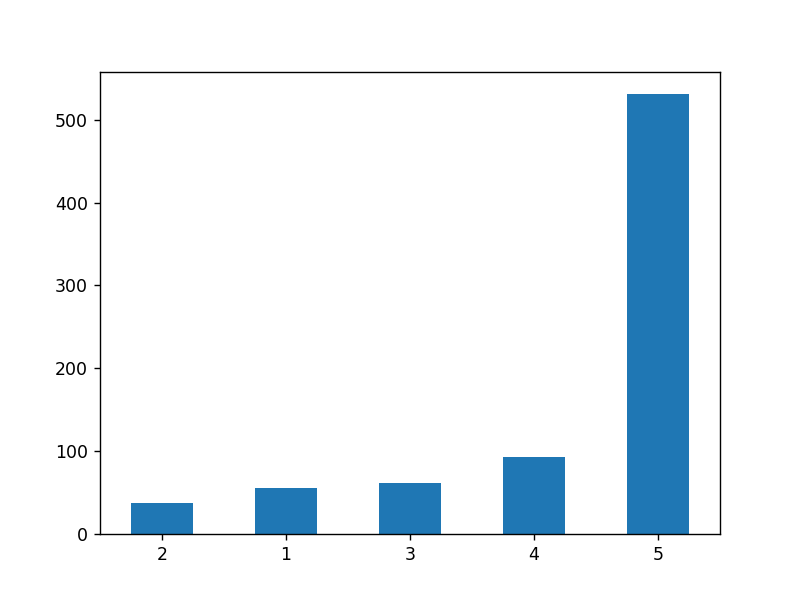

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

In [56]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.figure()
giraffe_reviews['rating'].value_counts(ascending=True).plot(kind='bar')
plt.xticks(rotation=0)

In [58]:
df.rating.value_counts()

5    106265
4     33053
3     16705
1     15100
2     11261
Name: rating, dtype: int64

In [59]:
df = df[df.rating != 3]


In [60]:
df['sentiment'] = df['rating'] >= 4

In [61]:
df.head()

,name,review,rating,word_count,sentiment
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,"{'and': 3, 'bags': 1, 'came': 1, 'disappointed...",True
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,"{'and': 2, 'anyone': 1, 'bed': 1, 'comfortable...",True
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,"{'about': 1, 'and': 3, 'anything': 1, 'approac...",True
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,"{'all': 2, 'allow': 1, 'an': 1, 'and': 2, 'bin...",True
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,"{'about': 2, 'adorable': 1, 'and': 2, 'any': 2...",True


In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [144]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], random_state=0, train_size=0.8)

In [111]:
sentiment_model = LogisticRegression()
X_train = vectorizer.fit_transform(X_train)

In [112]:
sentiment_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [113]:
sentiment_model.score(X_train, y_train)

0.9649245905102495

In [114]:
X_test = vectorizer.transform(X_test)
sentiment_model.score(X_test, y_test)

0.9315849830999517

In [115]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib notebook

In [116]:
def metric_roc_curve(fpr,tpr,roc_auc):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Sentiment Analyzing')
    plt.legend(loc="lower right")
    plt.show()

In [117]:
y_pred = sentiment_model.predict_proba(X_test)

In [118]:
fpr, tpr, _ = roc_curve(y_test, y_pred[:, 1])
roc_auc = auc(fpr, tpr)

<IPython.core.display.Javascript object>


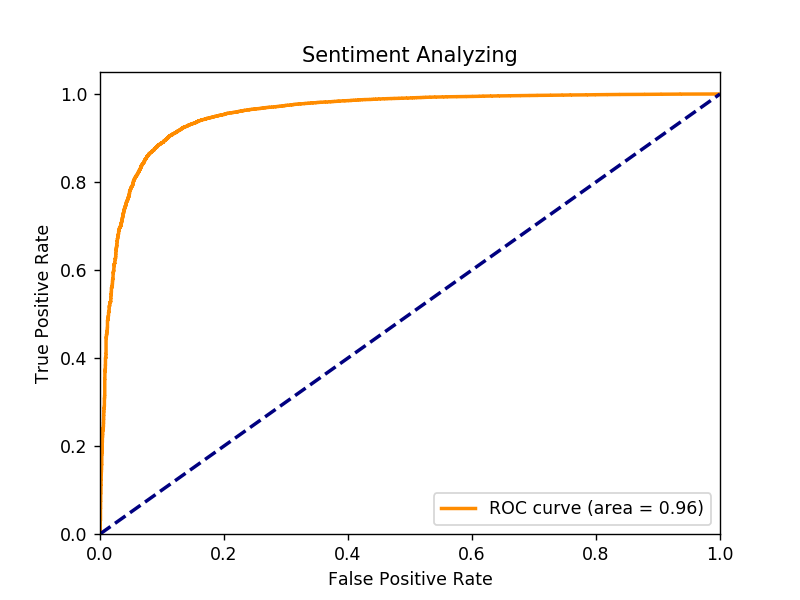

In [119]:
metric_roc_curve(fpr, tpr, roc_auc)

# Question 1

In [120]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']

In [132]:
index = {}
for word in selected_words:
    index[word] = 0
def f(s):
    for word in selected_words:
        if word in s:
            index[word] += s[word]

In [133]:
_ = df.word_count.apply(f)

In [134]:
index

{'amazing': 2624,
 'awesome': 3881,
 'awful': 687,
 'bad': 4181,
 'fantastic': 1661,
 'great': 55677,
 'hate': 1107,
 'horrible': 1109,
 'love': 41918,
 'terrible': 1145,
 'wow': 425}

In [137]:
max(index.items(), key=lambda x: x[1])

('great', 55677)

# Question two

In [138]:
min(index.items(), key=lambda x: x[1])

('wow', 425)

In [139]:
def selected_count(dic, word):
    if word in dic:
        return dic[word]
    return 0

In [140]:
for word in selected_words:
    df[word] = df.word_count.apply(selected_count, args=(word,))

In [146]:
X_train, X_test, y_train, y_test = train_test_split(df[selected_words], df['sentiment'], random_state=0, train_size=0.8)

In [148]:
model = LogisticRegression()

In [149]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [151]:
coeff = pd.DataFrame({'name': selected_words, 'value': model.coef_[0]})

In [157]:
coeff.sort_values('value')

,name,value
5,horrible,-2.259205
7,terrible,-2.139526
8,awful,-1.966605
10,hate,-1.374353
6,bad,-0.972990
9,wow,-0.178553
1,great,0.870031
2,fantastic,0.935030
3,amazing,1.073406
0,awesome,1.231553


In [158]:
model.score(X_test, y_test)

0.8494084983099952

In [160]:
np.sum(y_test)/len(list(y_test))

0.8424070497344278

In [162]:
df[df['name'] == 'Baby Trend Diaper Champ']

,name,review,rating,word_count,sentiment,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate
312,Baby Trend Diaper Champ,Ok - newsflash. Diapers are just smelly. We\...,4,"{'20': 1, '22': 1, 'about': 1, 'according': 1,...",True,0,0,0,0,0,0,0,0,0,0,0
314,Baby Trend Diaper Champ,"My husband and I selected the Diaper ""Champ"" m...",1,"{'about': 1, 'after': 1, 'air': 1, 'also': 1, ...",False,0,0,0,0,0,0,0,0,0,0,0
315,Baby Trend Diaper Champ,Excellent diaper disposal unit. I used it in ...,5,"{'3ply': 1, 'am': 1, 'bags': 1, 'conjunction':...",True,0,0,0,0,0,0,0,0,0,0,0
316,Baby Trend Diaper Champ,We love our diaper champ. It is very easy to ...,5,"{'all': 1, 'an': 1, 'and': 3, 'another': 2, 'a...",True,0,0,0,0,1,0,0,0,0,0,0
317,Baby Trend Diaper Champ,Two girlfriends and two family members put me ...,5,"{'13': 1, 'about': 2, 'access': 1, 'also': 1, ...",True,0,0,0,1,0,1,0,0,0,1,0
318,Baby Trend Diaper Champ,I waited to review this until I saw how it per...,4,"{'all': 1, 'and': 5, 'antibacterial': 1, 'arou...",True,0,0,0,0,0,0,1,0,0,0,0
319,Baby Trend Diaper Champ,I have had a diaper genie for almost 4 years s...,1,"{'able': 1, 'all': 1, 'almost': 1, 'also': 1, ...",False,0,0,0,0,0,0,0,0,0,0,0
320,Baby Trend Diaper Champ,I originally put this item on my baby registry...,5,"{'10': 1, 'about': 2, 'again': 1, 'air': 1, 'a...",True,0,0,0,0,0,0,0,0,0,0,0
321,Baby Trend Diaper Champ,I am so glad I got the Diaper Champ instead of...,5,"{'all': 1, 'am': 1, 'and': 2, 'any': 2, 'at': ...",True,0,0,0,0,0,0,0,0,0,0,0
322,Baby Trend Diaper Champ,We had 2 diaper Genie\'s both given to us as a...,4,"{'acutally': 1, 'also': 2, 'and': 6, 'are': 3,...",True,0,0,0,0,2,0,0,0,0,0,0


In [163]:
Baby_df = df[df['name']=='Baby Trend Diaper Champ']
X_train = Baby_df['review']
y_train = Baby_df['sentiment']


In [165]:
vectorize = CountVectorizer()

In [166]:
X_train = vectorize.fit_transform(X_train)

In [168]:
baby_model = LogisticRegression()
baby_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [174]:
Baby_df['pred'] = baby_model.predict_proba(X_train)[:, 1]

d:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [186]:
Baby_df['pred1'] = model.predict_proba(Baby_df[selected_words])[:, 1]

d:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [193]:
Baby_df.sort_values('pred', ascending=False)

,name,review,rating,word_count,sentiment,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate,pred,pred1
455,Baby Trend Diaper Champ,We put a Diaper Genie on the shower list for t...,5,"{'120': 1, '15': 3, '150': 2, '2x': 1, 'about'...",True,0,0,0,0,0,0,0,0,0,0,0,1.000000,0.789579
513,Baby Trend Diaper Champ,I have never written a review for Amazon but I...,5,"{'05': 1, '200': 1, '99': 1, 'about': 1, 'add'...",True,0,0,0,0,1,0,0,0,0,0,0,1.000000,0.937657
398,Baby Trend Diaper Champ,When our daughter was born we bought the diape...,5,"{'about': 1, 'all': 1, 'also': 2, 'and': 9, 'a...",True,0,1,0,0,0,0,0,0,0,0,0,1.000000,0.899567
328,Baby Trend Diaper Champ,Diaper Champ or Diaper Genie? That was my dile...,5,"{'all': 1, 'am': 1, 'and': 6, 'any': 1, 'appea...",True,0,1,0,0,0,0,0,0,0,0,0,0.999999,0.899567
446,Baby Trend Diaper Champ,I received my Diaper Champ at my baby shower f...,5,"{'11': 1, 'after': 1, 'ago': 1, 'and': 4, 'any...",True,0,0,0,0,3,0,0,0,0,0,0,0.999996,0.995879
414,Baby Trend Diaper Champ,We have been using our Diaper Champ for almost...,5,"{'14': 1, '2005': 1, 'advice': 1, 'all': 3, 'a...",True,0,0,0,0,0,0,0,0,0,0,0,0.999996,0.789579
547,Baby Trend Diaper Champ,I received the Diaper Champ at my baby shower ...,5,"{'after': 1, 'all': 1, 'also': 1, 'an': 1, 'an...",True,0,1,0,0,1,0,0,0,0,0,0,0.999994,0.972901
596,Baby Trend Diaper Champ,I love the Diaper Champ and I plan to get anot...,4,"{'11': 1, 'able': 1, 'about': 1, 'air': 2, 'al...",True,0,0,0,0,1,0,0,0,0,0,0,0.999989,0.937657
523,Baby Trend Diaper Champ,We researched all of the different types of di...,4,"{'15': 1, '20': 1, '30': 1, 'all': 3, 'am': 1,...",True,0,0,0,0,0,0,1,0,0,0,0,0.999987,0.586472
376,Baby Trend Diaper Champ,"This is absolutely, by far, the best diaper pa...",5,"{'about': 5, 'absolutely': 1, 'after': 1, 'an'...",True,0,0,0,0,2,0,0,0,0,0,0,0.999986,0.983683


In [197]:
Baby_df.sort_values('pred', ascending=False).iloc[0, 1]

"We put a Diaper Genie on the shower list for the first baby. We used it for 2 years and it was OK but we were fed up with it and I took a chance on the Diaper Champ for #2. After 5 months, we couldn\\'t be happier with Diaper Champ. Here\\'s a short list of the main reasons I\\'d recommend this against diaper genie:5. Diaper Champ doesn\\'t use expensive refills like the genie. We were going through 2-3 of those $5 refills a month with the genie. On the conservative side, say that was $120 a year in genie refills. With the Diaper Champ, I bought one big box of Glad Kitchen drawstring bags (150 bags) for $15 at the warehouse club. We change the bag 1-2x weekly. The 150 bags will probably last 1 1/2 -2 years, for $15. (The Champ box says you can use plastic grocery bags. Don\\'t. They\\'re way too small and don\\'t hold enough diapers to make it worth the while.)4. The Champ holds a lot more than the genie. Less frequent emptying.3. The genie was a pain to empty and even more work to ch